In [1]:
#importing respective libraries and setting up the enviornment

'''data working libraries'''
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
'''data visualisation libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

import data_viz as dviz

In [2]:
#loading the data
#data ="data/weight-height.csv"
#data = "data/circle.csv"

data = "data/triangle.csv"
#data = "data/linear.csv"
#data = "data/024f2liris.csv"
#data = "data/3rd.csv"
df = pd.read_csv(data)

x = np.array(df[df.columns[:-1]].values.tolist(), dtype=np.float64)
y = np.array(df[df.columns[-1]].values.tolist())
data=np.c_[x,y]

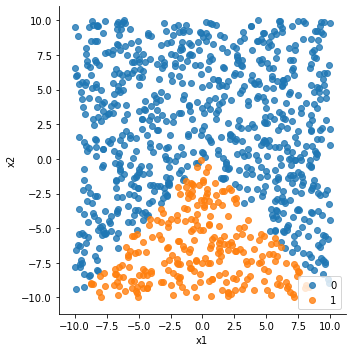

In [3]:
dviz.DDScatterDFSns(0, 1, df)

In [4]:
class Question:
    #initialise column and value variables->
    #eg->if ques is ->is sepal_length>=1cm then
    #sepal_length==col and 1cm=value
    def __init__(self,question,value=0):
        self.question=question
        self.value=value
        
#     def match(self, example):
#         # Compare the feature value in an example to the
#         # feature value in this question.
#         val = example[self.column]
#         if is_numeric(val):
#             return val >= self.value
#         else:
#             return val == self.value
    
    def match(self,data):
        value=data[self.column]
        return value>=self.value

    # This is just a helper method to print
    # the question in a readable format.
    def __repr__(self):
        condition = ">="
        return "Is %s %s %s?" % (
            str(self.theta), condition, str(self.value))
    
    
#this class represents all nodes in the tree
class DecisionNode:
    def __init__(self,question,true_branch,false_branch, rows):
        #question object stores col and val variables regarding the question of that node
        self.question = question # question = theta
        #this stores the branch that is true
        self.true_branch = true_branch
        #this stores the false branch
        self.false_branch = false_branch
        # store split parts
        self.rows = rows
        
#Leaf class is the one whichstores leaf of trees
#these are special Leaf Nodes -> on reaching them either
#100% purity is achieved or no features are left to split upon
class Leaf:
    def __init__(self,label):
        #stores unique labels and their values in prediction
        unique, counts = np.unique(label, return_counts=True)        
        self.predictions=dict(zip(unique, counts))    
        
class LeafT:
    def __init__(self, question, rows):
        self.question = question
        self.rows = rows

In [5]:
# best split
def best_split(rows):
    clf = LogisticRegression(solver='lbfgs')
    # rows[0]: features, rows[1]:label
        
    clf.fit(rows[0], rows[1])
    
    theta = np.append(clf.coef_, clf.intercept_)        
    pred = clf.predict(rows[0])
    
    return clf, theta, pred

def partition(rows, pred):
    left_rows = np.where(pred > 0)
    right_rows = np.where(pred <= 0) 

    # check node's purity
    #pos_idx = np.where(y[true_rows] == 1)
    #neg_idx = np.where(y[side] == 0)  

    Xl = rows[0][left_rows]    
    yl = rows[-1][left_rows]

    Xr = rows[0][right_rows]    
    yr = rows[-1][right_rows]
    
    return [Xl, yl], [Xr, yr]

In [6]:
def build_tree(rows, max_depth, depth):
    #takes the whole dataset as argument
    #gets the best gain and best question    
    
    model, theta, pred = best_split(rows)        
    dviz.viz_data_with_line_np(theta, rows)
    
    
    if len(rows[-1]) < 15:
        return Leaf(theta, rows)
                
    if depth >= max_depth:
        #return Leaf(rows[-1])
        return LeafT(theta, rows)
    
    pos_idx = np.where(y[rows[-1]] == 1)
    neg_idx = np.where(y[rows[-1]] == 0)
    
    if len(pos_idx[0]) < 20 and len(neg_idx[0]) < 20:        
        return LeafT(theta, rows)        
    
    #dviz.viz_data_np(rows)
    # If we reach here, we have found a useful feature / value
    # to partition on.                
    
    true_rows, false_rows = partition([x, y], pred)
    
    #print(len(true_rows[0]))    
    #print("true {}, false_rows {}".format(len(true_rows[-1]), len(false_rows[-1])))
    # Recursively build the true branch.
    tunique, tcounts = np.unique(true_rows[-1], return_counts=True)
    funique, fcounts = np.unique(false_rows[-1], return_counts=True)
    
    if len(tcounts) == 1 or len(fcounts) == 1:
        #make a leaf object and return
        return LeafT(theta, rows)
    
    """ Check minimun points here not in the above, 
        check on each split part for both classes it is less than 20 do not split further
        
    """
    if len(true_rows[-1]) > 20 and len(false_rows[-1]) > 20:
    #if tcounts[0] > 20 and tcounts[1] > 20 or fcounts[0] > 20 and fcounts[1] > 20:
        
        true_branch = build_tree(true_rows, max_depth, depth+1)            
        false_branch = build_tree(false_rows, max_depth, depth+1)
        
        return DecisionNode(theta, true_branch, false_branch, rows)

    else: 
        return LeafT(theta, rows)

In [7]:
tunique, tcounts = np.unique(y, return_counts=True)

#tunique
tcounts[0]

748

In [8]:
def print_tree(node,indentation=""):
    '''printing function'''
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if isinstance(node,LeafT):
        print(indentation+"PREDICTION",node.question)
        return 
    #print the question at node
    print(indentation + str(node.question))
    
    #call the function on true branch 
    print(indentation+ "Left Branch")
    print_tree(node.true_branch,indentation + "-->")
    
    #on flase branch
    print(indentation+ "Right Branch")
    print_tree(node.false_branch,indentation + "-->")

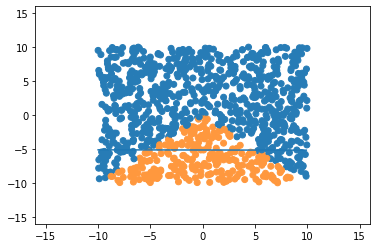

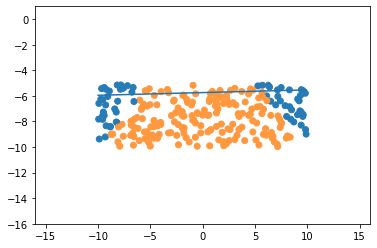

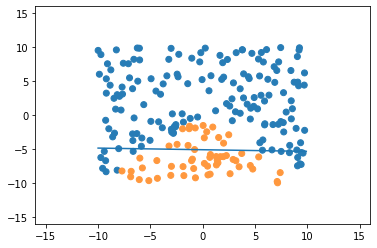

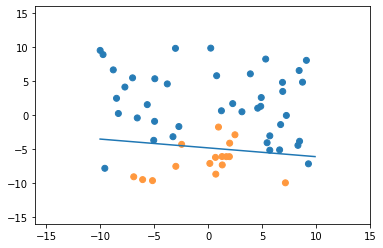

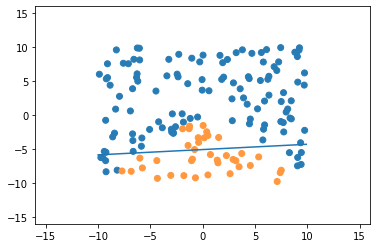

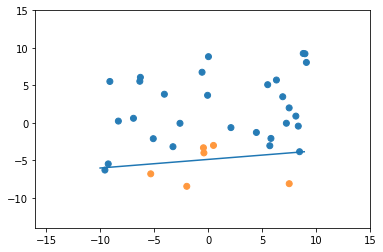

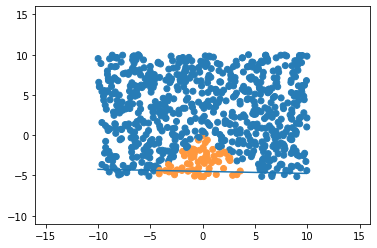

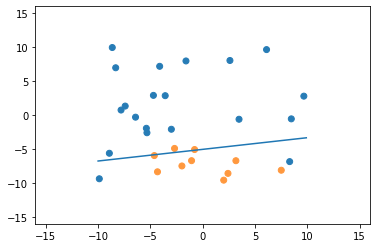

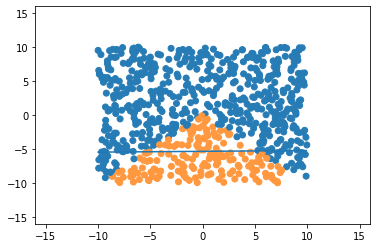

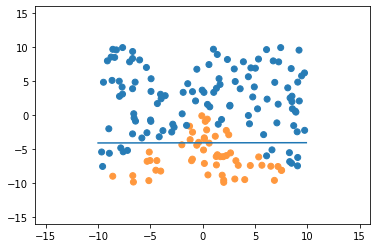

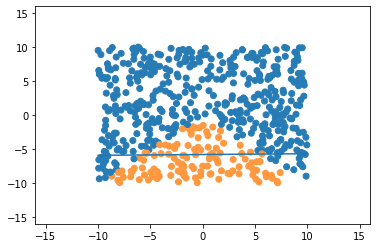

In [9]:
tree=build_tree([x, y], 4, 1)

In [10]:
print_tree(tree)

[-1.41642017e-03 -5.53342835e-01 -2.84377658e+00]
Left Branch
-->[ 0.01470128 -0.692145   -3.97339421]
-->Left Branch
-->-->[-0.01301312 -0.54169888 -2.76195397]
-->-->Left Branch
-->-->-->PREDICTION [-0.07712109 -0.5950116  -2.87201695]
-->-->Right Branch
-->-->-->PREDICTION [ 0.03988205 -0.51252191 -2.60017062]
-->Right Branch
-->-->PREDICTION [ 0.08168786 -0.71144891 -3.47080313]
Right Branch
-->[-0.01721645 -0.66994228 -3.00783752]
-->Left Branch
-->-->PREDICTION [ 0.09944483 -0.579281   -2.92163528]
-->Right Branch
-->-->[ 0.00626387 -0.54014401 -2.88164187]
-->-->Left Branch
-->-->-->PREDICTION [ 9.82741417e-04 -5.23432149e-01 -2.13718215e+00]
-->-->Right Branch
-->-->-->PREDICTION [ 0.00706274 -0.57933236 -3.36157061]


In [ ]:
#building the tree


"""""""take each part and save as csv or train agian then check what kind of line will appears
this is done by storing rows and theta for each root and leaf node

now clear unnecessary part resuable and push to git
then try two other method(opened tabs) for producing result
then try with doc2vec dataset


after getting feedback I must focus on best feature selection part

parameter:
    no of feature to combine(1, 3 or all)
    LR parameter like kernel function, learning rate, epochs
    measuring impurity(predict(), gini or entropy for now only predict())
    

test parameters before splitting in each node but this may not resolve local optima problem

    
ask what kind of dataset would be good for testing

Use random method to select feature combination
ragne: from 2 to all
    
    


In [174]:
print_tree(tree)

PREDICTION [ 0.01294483  0.00780087 -1.42541863]


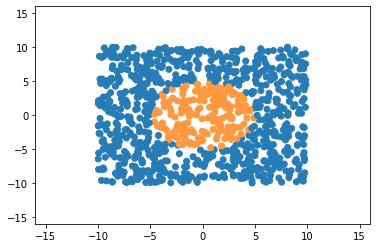

In [175]:
dviz.viz_data_with_line_np(tree.question, [x,y])

In [ ]:
rows = []
def show_all_lines(node):
    if isinstance(node,LeafT):
        print("last node",node.question)        
        rows.append(node.rows)
        dviz.viz_data_with_line_np(node.question, node.rows)
        return 
    rows.append(node.rows)
    dviz.viz_data_with_line_np(node.question, node.rows)
    
    show_all_lines(node.true_branch)
    show_all_lines(node.false_branch)

show_all_lines(tree)

In [12]:
len(rows[0][0])

1000

In [108]:
z = np.where(rows[0][1] == 0)
o = np.where(rows[0][1] == 1)
len(o[0])


4604

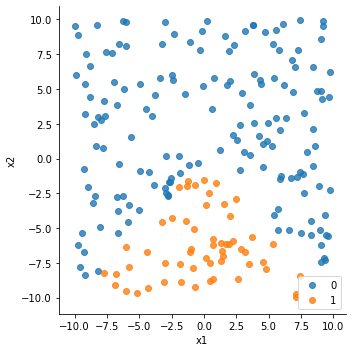

In [165]:
dviz.viz_data_np(rows[2])

In [192]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(rows[1][0], rows[1][1])
pred = clf.predict(rows[1][0])
clf.score(rows[1][0], rows[1][1])
print(confusion_matrix(rows[1][1], pred))
accuracy_score(rows[1][1], pred)
theta = np.append(clf.coef_, clf.intercept_)
dviz.viz_data_with_line_np(theta, rows[1])

IndexError: list index out of range

In [178]:
def classify(x_point, node):
    """See the 'rules of recursion' above."""
    if isinstance(node,LeafT):        
        pt = np.append(x_point, 1).reshape(len(x_point)+1, 1)
        r = node.question.dot(pt)        
        
        if r >= 0:
            r = 1
        else:
            r = 0
        return r        

    pt = np.append(x_point, 1).reshape(len(x_point)+1, 1)
    r = node.question.dot(pt)        
    
    if r > 0:        
        return classify(x_point, node.true_branch)
    else:
        return classify(x_point, node.false_branch)


In [179]:
print(classify(x[35], tree))

0


In [73]:

""""!!!!""""print tree and see on classify function by passing one one sample
check if in each node and right and left produce probability which is 0 or 1 check 

1


In [180]:
def predict(x, tree):
    yh_list = []
    if len(x.shape) == 1:
        return classify(x, tree)
    else:
        for i, value in enumerate(x):
            yh = classify(value, tree)
            yh_list.append(yh)
        return yh_list

In [207]:
y_pred = predict(x, tree)
print(classification_report(y, y_pred, labels=[0, 1]))
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))




#try other linear model see if results will be same or different
#svm, linear regression, perceptron, neural network


              precision    recall  f1-score   support

           0       0.91      0.92      0.92       748
           1       0.77      0.74      0.75       252

    accuracy                           0.88      1000
   macro avg       0.84      0.83      0.84      1000
weighted avg       0.88      0.88      0.88      1000

0.878
[[691  57]
 [ 65 187]]


In [31]:
this is good but I have to define what how to get true and flase label because its not like you get everything at once #
it is theta.X >= 0

so calculate predict value in each leaf node :)
    

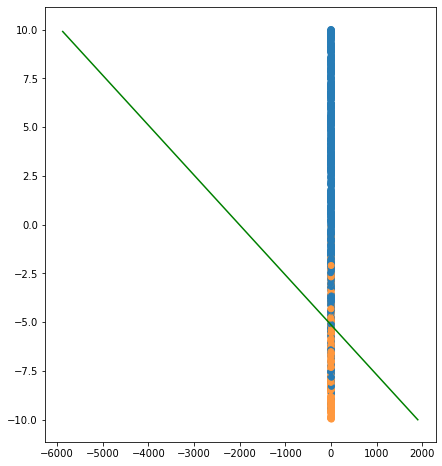

In [32]:
dviz.viz_data_with_line(tree.question, [x,y])